# Installations and Imports

In [1]:
! pip install --upgrade --quiet torch==2.6.0 torchvision==0.17.0
! pip install --upgrade --quiet sentence-transformers pymilvus langchain-community datasets

ERROR: Cannot install torch==2.6.0 and torchvision==0.17.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import datasets
import random
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from pymilvus import connections, FieldSchema, CollectionSchema, DataType, Collection, utility

# Vars

In [3]:
ZILLIZ_HOST = "https://in03-a0eeae152813031.serverless.gcp-us-west1.cloud.zilliz.com"
ZILLIZ_TOKEN = "11f745d88b0214e620cc06ee7e360ab0180368ff8c57a104dda4df9d8480cf420a35444456a2b143df031d26fc9f1bda5250df29"
embedding_models = {}
connections.connect(alias="default", uri=ZILLIZ_HOST, token=ZILLIZ_TOKEN)

# Embedding models

In [4]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda")
  print("Using GPU:", torch.cuda.get_device_name(0))
else:
  device = torch.device("cpu")
  print("Using CPU")

# if "Gujarati SBERT STS" not in embedding_models:
#   gujarati_sbert_model_name = "l3cube-pune/gujarati-sentence-similarity-sbert"
#   embedding_models["Gujarati SBERT STS"] = SentenceTransformer(gujarati_sbert_model_name).to(device)

if "jina-emb-v3" not in embedding_models:
  jina_embedding_model_name = "jinaai/jina-embeddings-v3"
  embedding_models["jina-emb-v3"] = SentenceTransformer(jina_embedding_model_name, trust_remote_code=True).to(device)
model = embedding_models["jina-emb-v3"]
# if "robert-hgs" not in embedding_models:
#   roberta_model_name = "surajp/RoBERTa-hindi-guj-san"
#   embedding_models["roberta-hgs"] = SentenceTransformer(roberta_model_name).to(device)

print("Embedding models loaded")

Using CPU


modules.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/734k [00:00<?, ?B/s]

custom_st.py:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v3:
- custom_st.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- stochastic_depth.py
- mha.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- mlp.py
- block.py
- embedding.py
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_lora.py
- modeling_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

Embedding models loaded


# Loading files

In [ ]:
# embedding_dimension_m1 = embedding_models["Gujarati SBERT STS"].get_sentence_embedding_dimension()
embedding_dimension_m2 = embedding_models["jina-emb-v3"].get_sentence_embedding_dimension()
# embedding_dimension_m3 = embedding_models["roberta-hgs"].get_sentence_embedding_dimension()


file_path = "/content/drive/MyDrive/Gujarati_Spelling_and_Grammar_Autocorrect/data/Gujarati_gold_sentences_10k.txt"
with open(file_path, "r", encoding="utf-8") as f:
    sentences = f.read().splitlines()
np.random.shuffle(sentences)

# Generate embeddings for each model
# embeddings_m1 = embedding_models["Gujarati SBERT STS"].encode(sentences, convert_to_numpy=True)
embeddings = embedding_models["jina-emb-v3"].encode(sentences, convert_to_numpy=True)
# embeddings_m3 = embedding_models["roberta-hgs"].encode(sentences, convert_to_numpy=True)

# Create datasets for each model's embeddings
# dataset_m1 = datasets.Dataset.from_dict({"sentence": sentences, "embedding": embeddings_m1.tolist()})
dataset = datasets.Dataset.from_dict({"sentence": sentences, "embedding": embeddings.tolist()})
# dataset_m3 = datasets.Dataset.from_dict({"sentence": sentences, "embedding": embeddings_m3.tolist()})

# Save the datasets
# dataset_m1.save_to_disk("gujarati_embeddings_dataset_m1")
dataset.save_to_disk("dataset")
# dataset_m3.save_to_disk("gujarati_embeddings_dataset_m3")

print("Datasets created and saved for each model.")
# print("Dataset M1:", dataset_m1)
# print("Dataset M2:", dataset_m2)
print("Dataset:", dataset)

KeyboardInterrupt: 

In [ ]:
for i in range(20):
  print(dataset[i])

# Collection creation

In [ ]:
collection_names = ["temp_collection_m1", "temp_collection_m2", "temp_collection_m3"]

# Schema for M1 collection
fields_m1 = [
    FieldSchema(name="id", dtype=DataType.INT64, is_primary=True, auto_id=True),
    FieldSchema(name="sentence", dtype=DataType.VARCHAR, max_length=65000),
    FieldSchema(name="embedding", dtype=DataType.FLOAT_VECTOR, dim=embedding_dimension_m1)
]
schema_m1 = CollectionSchema(fields_m1, description="Temporary collection for M1 embeddings")

# Schema for M2 collection
fields_m2 = [
    FieldSchema(name="id", dtype=DataType.INT64, is_primary=True, auto_id=True),
    FieldSchema(name="sentence", dtype=DataType.VARCHAR, max_length=65000),
    FieldSchema(name="embedding", dtype=DataType.FLOAT_VECTOR, dim=embedding_dimension_m2)
]
schema_m2 = CollectionSchema(fields_m2, description="Temporary collection for M2 embeddings")

# Schema for M3 collection
fields_m3 = [
    FieldSchema(name="id", dtype=DataType.INT64, is_primary=True, auto_id=True),
    FieldSchema(name="sentence", dtype=DataType.VARCHAR, max_length=65000),
    FieldSchema(name="embedding", dtype=DataType.FLOAT_VECTOR, dim=embedding_dimension_m3)
]
schema_m3 = CollectionSchema(fields_m3, description="Temporary collection for M3 embeddings")

schemas = [schema_m1, schema_m2, schema_m3]
collections = {}

# Create collections if they do not exist
for i, collection_name in enumerate(collection_names):
    if collection_name not in utility.list_collections():
        collection = Collection(name=collection_name, schema=schemas[i])
        # Assuming the same index type and metric for all temporary collections
        collection.create_index("embedding", {"index_type": "IVF_FLAT", "metric_type": "COSINE", "params": {"nlist": 1024}})
        print(f"Collection '{collection_name}' created.")
    else:
        collection = Collection(name=collection_name)
        print(f"Collection '{collection_name}' already exists.")
    collection.load()
    collections[collection_name] = collection

print("Temporary collections created and loaded.")

Collection 'temp_collection_m1' already exists.
Collection 'temp_collection_m2' already exists.
Collection 'temp_collection_m3' created.
Temporary collections created and loaded.


In [ ]:
# prompt: Write code to create a collection named 'history' with following schema:
# corrected_sentence:
# incorrect_sentence:
# embedding: dim=1024

# Schema for history collection
fields_history = [
    FieldSchema(name="id", dtype=DataType.INT64, is_primary=True, auto_id=True),
    FieldSchema(name="corrected_sentence", dtype=DataType.VARCHAR, max_length=65535),
    FieldSchema(name="incorrect_sentence", dtype=DataType.VARCHAR, max_length=65535),
    FieldSchema(name="embedding", dtype=DataType.FLOAT_VECTOR, dim=1024) # Assuming embedding_dimension_m2 is the correct dimension from the previous code
]
schema_history = CollectionSchema(fields_history, description="Collection to store history of corrected and incorrect sentences")

collection_name_history = "history"

# Create history collection if it does not exist
if collection_name_history not in utility.list_collections():
    collection_history = Collection(name=collection_name_history, schema=schema_history)
    # Assuming the same index type and metric as the temporary collections
    collection_history.create_index("embedding", {"index_type": "IVF_FLAT", "metric_type": "COSINE", "params": {"nlist": 1024}})
    print(f"Collection '{collection_name_history}' created.")
else:
    collection_history = Collection(name=collection_name_history)
    print(f"Collection '{collection_name_history}' already exists.")

collection_history.load()

Collection 'history' already exists.


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Define collection schema
collection_name = "gold_sentences"
fields = [
    FieldSchema(name="id", dtype=DataType.INT64, is_primary=True, auto_id=True),
    FieldSchema(name="sentence", dtype=DataType.VARCHAR, max_length=65000),  # Adjust max_length if needed
    FieldSchema(name="embedding", dtype=DataType.FLOAT_VECTOR, dim=1024)  # SBERT embeddings have 768 dimensions
]
schema = CollectionSchema(fields, description="Gujarati gold standard sentences")

# Create collection if it does not exist
if collection_name not in utility.list_collections():
    collection1 = Collection(name=collection_name, schema=schema)
    collection1.create_index("embedding", {"index_type": "IVF_FLAT", "metric_type": "COSINE", "params": {"nlist": 1024}})
    print(f"Collection '{collection_name}' created.")
else:
    collection1 = Collection(name=collection_name)
    print(f"Collection '{collection_name}' already exists.")

collection1.load()


Collection 'gold_sentences' already exists.


In [ ]:
collection_name = "human_curated_dataset"

fields = [
    FieldSchema(name="id", dtype=DataType.INT64, is_primary=True, auto_id=True),
    FieldSchema(name="correct_sentence", dtype=DataType.VARCHAR, max_length=65000),
    FieldSchema(name="incorrect_sentence", dtype=DataType.VARCHAR, max_length=65000),
    FieldSchema(name="embedding", dtype=DataType.FLOAT_VECTOR, dim=1024)
]

schema = CollectionSchema(fields, description="Human-curated dataset for sentence correction")

if collection_name not in utility.list_collections():
    collection = Collection(name=collection_name, schema=schema)
    collection.create_index("embedding", {"index_type": "IVF_FLAT", "metric_type": "COSINE", "params": {"nlist": 1024}})
    print(f"Collection '{collection_name}' created.")
else:
    collection = Collection(name=collection_name)
    print(f"Collection '{collection_name}' already exists.")

collection.load()

Collection 'human_curated_dataset' already exists.


# Data Insertion

In [ ]:
# print("Inserting data into temporary collections...")

# # Insert into temp_collection_m1
# collection_m1 = collections["temp_collection_m1"]
# sentences_m1 = dataset_m1["sentence"]
# embeddings_m1 = dataset_m1["embedding"]
# # Insert in batches to avoid exceeding gRPC limits for large datasets
# batch_size = 1000
# for i in range(0, len(sentences_m1), batch_size):
#     batch_sentences = sentences_m1[i:i+batch_size]
#     batch_embeddings = embeddings_m1[i:i+batch_size]
#     collection_m1.insert([batch_sentences, batch_embeddings])
#     collection_m1.flush()
#     print(f"Inserted batch {i//batch_size + 1} into 'temp_collection_m1'.")
# print(f"Finished inserting into 'temp_collection_m1'. Total records: {len(sentences_m1)}")


# # Insert into temp_collection_m2
# collection_m2 = collections["temp_collection_m2"]
# sentences_m2 = dataset_m2["sentence"]
# embeddings_m2 = dataset_m2["embedding"]
# # Insert in batches
# for i in range(0, len(sentences_m2), batch_size):
#     batch_sentences = sentences_m2[i:i+batch_size]
#     batch_embeddings = embeddings_m2[i:i+batch_size]
#     collection_m2.insert([batch_sentences, batch_embeddings])
#     collection_m2.flush()
#     print(f"Inserted batch {i//batch_size + 1} into 'temp_collection_m2'.")
# print(f"Finished inserting into 'temp_collection_m2'. Total records: {len(sentences_m2)}")

# Insert into temp_collection_m3
# collection_m3 = collections["temp_collection_m3"]
# sentences_m3 = dataset_m3["sentence"]
# embeddings_m3 = dataset_m3["embedding"]
# # Insert in batches
# for i in range(0, len(sentences_m3), batch_size):
#     batch_sentences = sentences_m3[i:i+batch_size]
#     batch_embeddings = embeddings_m3[i:i+batch_size]
#     collection_m3.insert([batch_sentences, batch_embeddings])
#     collection_m3.flush()
#     print(f"Inserted batch {i//batch_size + 1} into 'temp_collection_m3'.")
# print(f"Finished inserting into 'temp_collection_m3'. Total records: {len(sentences_m3)}")

Inserting data into temporary collections...
Inserted batch 1 into 'temp_collection_m3'.
Inserted batch 2 into 'temp_collection_m3'.
Inserted batch 3 into 'temp_collection_m3'.
Inserted batch 4 into 'temp_collection_m3'.
Inserted batch 5 into 'temp_collection_m3'.
Finished inserting into 'temp_collection_m3'. Total records: 5000


In [ ]:
sentences = dataset["sentence"]
embeddings = dataset["embedding"]

collection1.insert([sentences, embeddings])
collection1.flush()

print(f"Inserted {len(sentences)} records into 'gold_sentences' collection.")

# Query and Analysis

In [14]:
def retrieve_similar_sentences(query_sentence, top_k=5):
    """Retrieve top-k similar sentences from the gold_sentences collection."""

    collection = Collection("gold_sentences")
    collection.load()

    query_embedding = model.encode([query_sentence]).tolist()
    search_params = {"metric_type": "COSINE", "params": {"nprobe": 100}}
    results = collection.search(
        data=query_embedding, anns_field="embedding", param=search_params, limit=top_k, output_fields=["sentence"]
    )
    return [(hit.entity.get("sentence"), hit.distance) for hit in results[0]]

query = "રાજા નિશ્ચિંત રહેશે તો વિજય નિશ્ચિંત છે."
similar_sentences = retrieve_similar_sentences(query, top_k=5)

for sentence, score in similar_sentences:
    print(f"Matched: {sentence} | Score: {score:.4f}")

Matched: તેને અંતે વિજય છે જ એમ નિશ્ચય પૂર્વક માનવું એટલે વિજય થશે જ. | Score: 0.7118
Matched: રાજાઓને ચક્રવર્તી સત્તાનો ડર લાગતો હોય તો તે પણ નિષ્કારણ છે. | Score: 0.6967
Matched: નથી, કેમકે રાજાએ પોતાની લગભગ બધી સત્તા છોડી દીધી છે એમ જાણ્યા પછી લોકો કોની સામે બળવો કરવાના? | Score: 0.6871
Matched: વિજય : હાલ કરતાં ખરાબ ગતિ નહિ થાય. અને, કિશન મહારાજના મરણનું વૃતાંત પ્રગટ થાય તો તેમના પુત્રને અભાવે ગાદી માટે કોણ જાણે કેવીયે લડાઈઓ જાગે અને રાજ્ય કેવું પાયમાલ થઈ જાય તેનો વિચાર કર્યો ? વળી, કિશનના સામંતો તે કંઈ વંશપરંપરાના હકદાર નથી. કિશન સાથે આ દેશમાં નવા આવેલા તમારા સરખા સામંતોની જાગીરો જે નવો રાજા કોણ જાણે ક્યાંથી આખરે આવે, તે પળે એની શી ખાતરી ? રાજ ગાદીએ આવે તો એવી ચિતાનું કારણ ન રહે. તમારી સેવાની કદર પણ એ જરૂર કરે. | Score: 0.6846
Matched: એવા રાજા હશે ત્યારે દેશમાં દુકાળ, ભૂખમરો, વ્યભિચાર, શરાબ નહિ હોય. | Score: 0.6483


In [ ]:
collection = Collection("history")
collection.load()

# Retrieve data in batches to avoid exceeding gRPC message size limit
batch_size = 100  # Adjust batch size as needed
num_entities = collection.num_entities
data = []

for offset in range(0, num_entities, batch_size):
    # Retrieve data for the current batch, excluding the 'embedding' field
    batch_data = collection.query(
        expr="id > 0",
        output_fields=["id", "corrected_sentence", "incorrect_sentence"],  # Exclude 'embedding'
        offset=offset,
        limit=batch_size,
    )
    data.extend(batch_data)  # Append batch data to the overall results

data

[{'corrected_sentence': 'રાજાઓ સ્વેચ્છાએ પોતાની પ્રજાની સત્તાને તાબે થાય, એટલે મહાસભા જરૂર તેમની જોડે મિત્રાચારી કરશે.',
  'incorrect_sentence': 'રાજાઓ સ્વેચ્છાએ પોતાની પ્રજાની સત્તાને તાબે થાય, એટલે મહાસભા જરૂર તેમની જોડે મિત્રાચારી કરશે\n',
  'id': 457840590696888520},
 {'corrected_sentence': 'તમે ક્યાં જાઓ છો?',
  'incorrect_sentence': 'તમે ક્યાં જાઓ છો?\n',
  'id': 457840590696888544},
 {'corrected_sentence': 'કોઈ પણ નાટક ભજવવામાં એ આવશ્યક છે, પણ અહીં તેનો વિશેષ ઉપયોગ કર્યો છે માટે ખાસ ધ્યાન ખેંચું છું.',
  'incorrect_sentence': 'કોઈ પણ નાટક ભજવવામાં એ આવશ્યક છે, પણ અહીં તેનો વિશેષ ઉપયોગ કર્યો છે માટે ખાસ ધ્યાન ખેંચું છું\n',
  'id': 457840590696888546},
 {'corrected_sentence': 'પણ જેનો સત્યાગ્રહમાં વિશ્વાસ છે તે, રાજા માત્ર નકામા છે અથવા રાજ્યસંસ્થા સુધરી જ ન શકે એવું કદી નહીં કહે.',
  'incorrect_sentence': 'પણ જેનો સત્યાગ્રહમાં વિશ્વાસ છે તે, રાજા માત્ર નકામા છે અથવા રાજ્યસંસ્થા સુધરી જ ન શકે એવુ કદી નહી કહે\n',
  'id': 457840590696888548},
 {'corrected_sentence': 'જ્યારે નાની છો

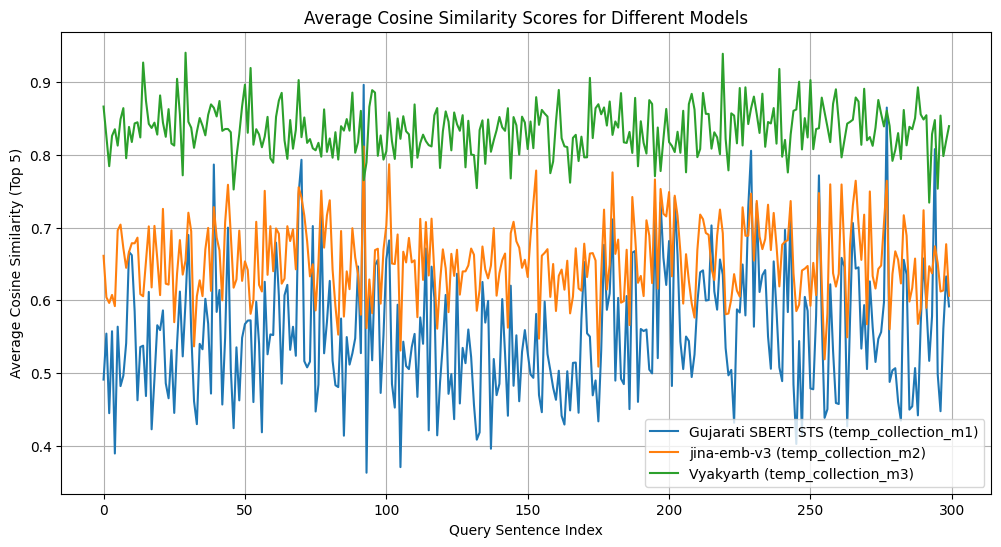

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from a file
file_path = "/content/drive/MyDrive/Gujarati_Spelling_and_Grammar_Autocorrect/evaluation_set.json"
with open(file_path, 'r', encoding='utf-8') as f:
    query_data = json.load(f)

# Extract incorrect sentences
incorrect_sentences_queries = [item["incorrect_sentence"] for item in query_data]

# Prepare the result file
output_file_path = "/content/drive/MyDrive/Gujarati_Spelling_and_Grammar_Autocorrect/similarity_results_1.txt"
result_lines = []

# Function to search and return similarity results
def search_and_score(query_sentence, collection_name, model):
    collection = collections[collection_name]
    collection.load()

    query_embedding = model.encode([query_sentence]).tolist()
    search_params = {"metric_type": "COSINE", "params": {"nprobe": 10}}
    results = collection.search(
        data=query_embedding,
        anns_field="embedding",
        param=search_params,
        limit=5,
        output_fields=["sentence"]
    )

    similar_sentences_data = []
    average_score = 0
    if results and len(results[0]) > 0:
        for hit in results[0]:
            sentence = hit.entity.get("sentence")
            similarity = hit.distance
            similar_sentences_data.append({"sentence": sentence, "similarity": similarity})
            average_score += similarity
        average_score /= len(results[0])
    else:
        result_lines.append(f"No similar sentences found for query: '{query_sentence}' in '{collection_name}'")

    return similar_sentences_data, average_score

# Store average scores
avg_scores_m1 = []
avg_scores_m2 = []
avg_scores_m3 = []

# Loop through each incorrect sentence
for idx, query_sentence in enumerate(incorrect_sentences_queries):
    result_lines.append(f"\nQuery Sentence {idx + 1}: '{query_sentence}'")

    collection_name_m1 = "temp_collection_m1"
    model_m1 = embedding_models["Gujarati SBERT STS"]
    similar_m1, avg_score_m1 = search_and_score(query_sentence, collection_name_m1, model_m1)
    result_lines.append(f"Results from '{collection_name_m1}':")
    for item in similar_m1:
        result_lines.append(f"  Sentence: {item['sentence']} | Similarity: {item['similarity']:.4f}")
    result_lines.append(f"  Average Similarity: {avg_score_m1:.4f}")
    avg_scores_m1.append(avg_score_m1)

    collection_name_m2 = "temp_collection_m2"
    model_m2 = embedding_models["jina-emb-v3"]
    similar_m2, avg_score_m2 = search_and_score(query_sentence, collection_name_m2, model_m2)
    result_lines.append(f"Results from '{collection_name_m2}':")
    for item in similar_m2:
        result_lines.append(f"  Sentence: {item['sentence']} | Similarity: {item['similarity']:.4f}")
    result_lines.append(f"  Average Similarity: {avg_score_m2:.4f}")
    avg_scores_m2.append(avg_score_m2)

    collection_name_m3 = "temp_collection_m3"
    model_m3 = embedding_models["roberta-hgs"]
    similar_m3, avg_score_m3 = search_and_score(query_sentence, collection_name_m3, model_m3)
    result_lines.append(f"Results from '{collection_name_m3}':")
    for item in similar_m3:
        result_lines.append(f"  Sentence: {item['sentence']} | Similarity: {item['similarity']:.4f}")
    result_lines.append(f"  Average Similarity: {avg_score_m3:.4f}")
    avg_scores_m3.append(avg_score_m3)

# Write results to the file
with open(output_file_path, 'w', encoding='utf-8') as f:
    f.write("\n".join(result_lines))

# Plot the average similarity scores
plt.figure(figsize=(12, 6))
plt.plot(range(len(incorrect_sentences_queries)), avg_scores_m1, label='Gujarati SBERT STS (temp_collection_m1)')
plt.plot(range(len(incorrect_sentences_queries)), avg_scores_m2, label='jina-emb-v3 (temp_collection_m2)')
plt.plot(range(len(incorrect_sentences_queries)), avg_scores_m3, label='Vyakyarth (temp_collection_m3)')

plt.xlabel("Query Sentence Index")
plt.ylabel("Average Cosine Similarity (Top 5)")
plt.title("Average Cosine Similarity Scores for Different Models")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prompt: Write code to remove duplicate sentences from the text file

file_path = "/content/drive/MyDrive/Gujarati_Spelling_and_Grammar_Autocorrect/data/Gujarati_gold_sentences_10k.txt"

# Read sentences from the file
with open(file_path, "r", encoding="utf-8") as f:
    sentences = f.read().splitlines()

# Use a set to store unique sentences
unique_sentences = set()
for sentence in sentences:
    unique_sentences.add(sentence.strip()) # Strip leading/trailing whitespace

# Convert the set back to a list
unique_sentences_list = list(unique_sentences)

# Optional: Overwrite the original file with unique sentences
# Or write to a new file
output_file_path = "/content/drive/MyDrive/Gujarati_Spelling"
with open(output_file_path, "w", encoding="utf-8") as f:
    for sentence in unique_sentences_list:
        f.write(sentence + "\n")

print(f"Original number of sentences: {len(sentences)}")
print(f"Number of unique sentences: {len(unique_sentences_list)}")
print(f"Unique sentences written to: {output_file_path}")


Original number of sentences: 10055
Number of unique sentences: 10007
Unique sentences written to: /content/drive/MyDrive/Gujarati_Spelling_and_Grammar_Autocorrect/data/Gujarati_gold_sentences_10k.txt
